In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
%matplotlib inline

In [13]:
d = 100 # dimensions of data
n = 1000 # number of data points

In [14]:
np.random.seed(42)
hf_train_sz = int(0.8 * n//2)

X_pos = np.random.normal(size=(n//2, d))
X_pos = X_pos + .12

X_neg = np.random.normal(size=(n//2, d))
X_neg = X_neg - .12

X_train = np.concatenate([X_pos[:hf_train_sz], 
                          X_neg[:hf_train_sz]])
X_test = np.concatenate([X_pos[hf_train_sz:], 
                         X_neg[hf_train_sz:]])

y_train = np.concatenate([np.ones(hf_train_sz), 
                          -1 * np.ones(hf_train_sz)])
y_test = np.concatenate([np.ones(n//2 - hf_train_sz), 
                         -1 * np.ones(n//2 - hf_train_sz)])

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
def sgd(w, X, y, X_te, y_te, step_sz, steps):
    tr_obj_vals, obj_vals, loss01_vals, tr_loss01_vals = [], [], [], []
    for _ in range(steps):
        i = np.random.randint(X.shape[0])
        gradient = -y[i] * X[i] * sigmoid(-y[i] * (w.T @ X[i].reshape(-1, 1)))
        w -= step_sz * gradient
        tr_obj_vals.append(np.mean(np.log(1 + np.exp(-y * (X @ w)))))
        obj_vals.append(np.mean(np.log(1 + np.exp(-y_te * (X_te @ w)))))
        tr_loss01_vals.append(np.mean(np.sign(X @ w) != y))
        loss01_vals.append(np.mean(np.sign(X_te @ w) != y_te))
    # return tr_obj_vals, obj_vals, None, None  # Return statement for part 4.1

    # tr_loss01_vals = None  # You may also want to plot this for sanity check
    return tr_obj_vals, obj_vals, loss01_vals, tr_loss01_vals  # Return statement for part 4.2

In [17]:
tr_obj_vals1, obj_vals1, loss01_vals1, tr_loss01_vals1 = sgd(np.zeros(d), X_train, y_train, X_test, y_test, 
                                                             0.0005, 5000)
tr_obj_vals2, obj_vals2, loss01_vals2, tr_loss01_vals2 = sgd(np.zeros(d), X_train, y_train, X_test, y_test, 
                                                             0.005, 5000)
tr_obj_vals3, obj_vals3, loss01_vals3, tr_loss01_vals3 = sgd(np.zeros(d), X_train, y_train, X_test, y_test, 
                                                             0.05, 5000)

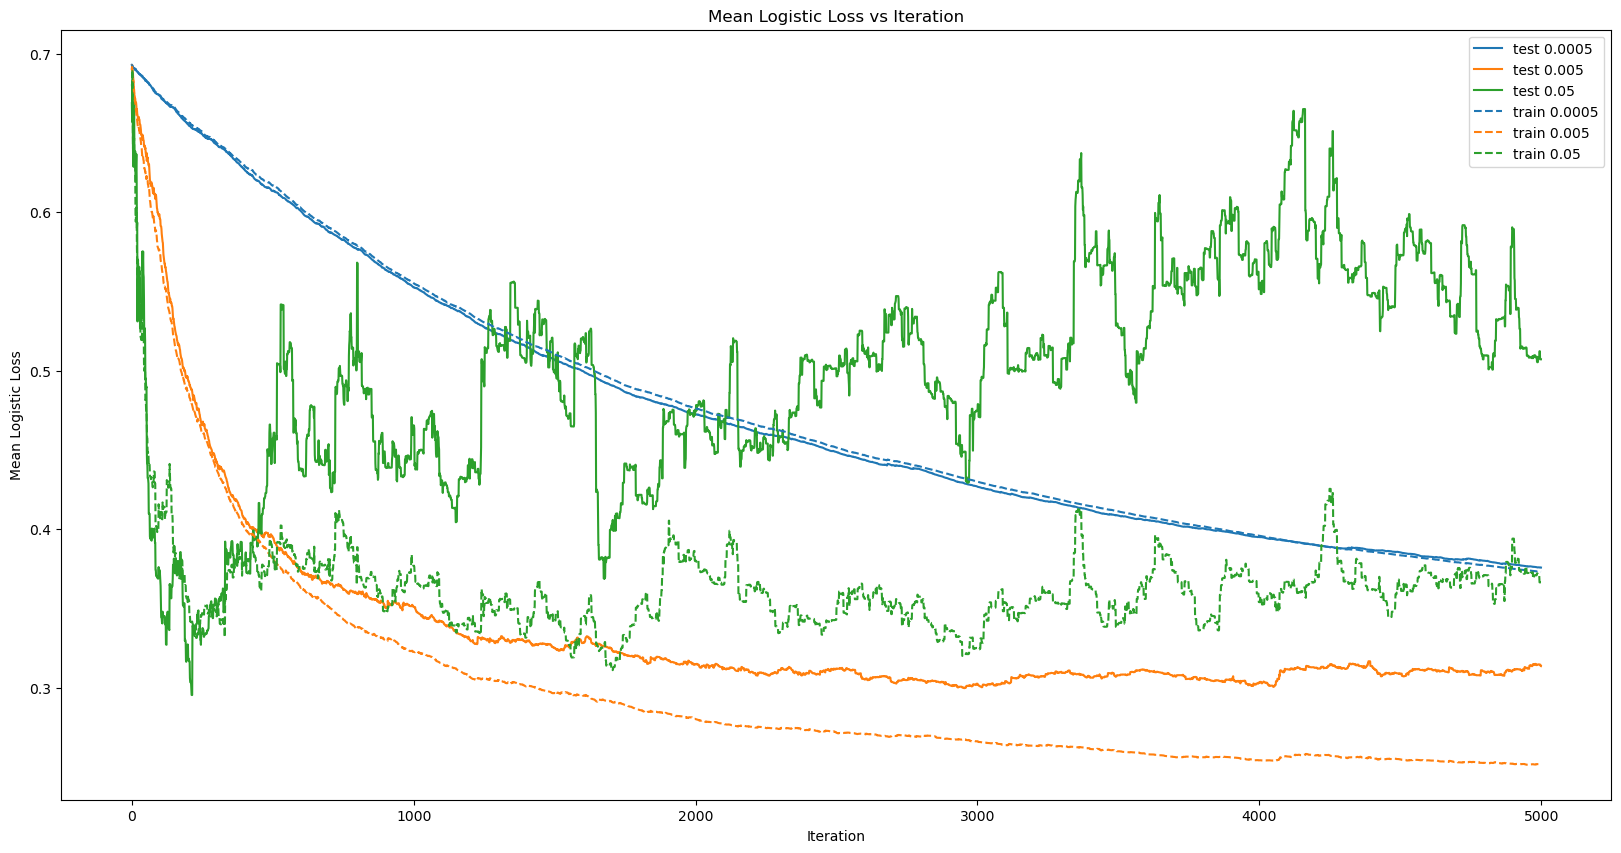

In [18]:
plt.plot(np.arange(5000), obj_vals1, label="test 0.0005")
plt.plot(np.arange(5000), obj_vals2, label="test 0.005")
plt.plot(np.arange(5000), obj_vals3, label="test 0.05")

plt.plot(np.arange(5000), tr_obj_vals1, '--', color='#1f77b4', label="train 0.0005")
plt.plot(np.arange(5000), tr_obj_vals2, '--', color='#ff7f0e', label="train 0.005")
plt.plot(np.arange(5000), tr_obj_vals3, '--', color='#2ca02c', label="train 0.05")

plt.title("Mean Logistic Loss vs Iteration")
plt.xlabel('Iteration')
plt.ylabel('Mean Logistic Loss')
# plt.ylim(bottom=0)

fig = plt.gcf()
fig.set_size_inches((20, 10))
plt.legend()
# For different step sizes, test errors are all higher than training error.
# A proper increase in the step size will speed up convergence thus obtaining a lower error rate, but when the step size is too large, the error rate rises instead.

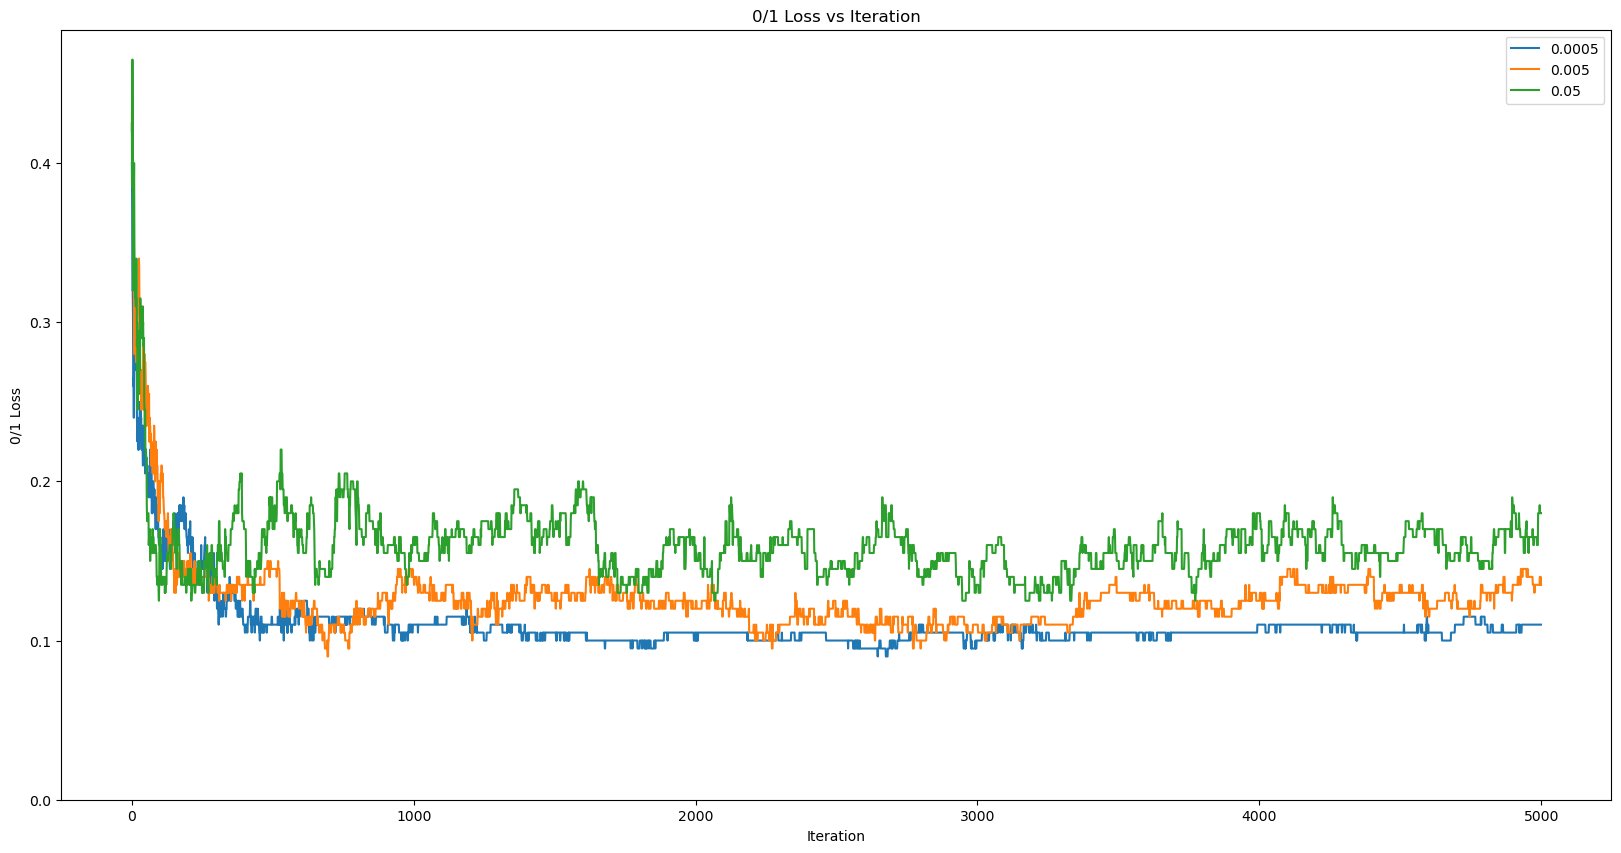

In [19]:
plt.plot(np.arange(5000), loss01_vals1, label="0.0005")
plt.plot(np.arange(5000), loss01_vals2, label="0.005")
plt.plot(np.arange(5000), loss01_vals3, label="0.05")

# plt.plot(np.arange(5000), tr_loss01_vals1, '--', color='#1f77b4', label="train 0.0005")
# plt.plot(np.arange(5000), tr_loss01_vals2, '--', color='#ff7f0e', label="train 0.005")
# plt.plot(np.arange(5000), tr_loss01_vals3, '--', color='#2ca02c', label="train 0.05")

plt.title("0/1 Loss vs Iteration")
plt.xlabel('Iteration')
plt.ylabel('0/1 Loss')
plt.ylim(bottom=0)
# plt.ylim(bottom=0.5, top=1.0)

fig = plt.gcf()
fig.set_size_inches((20, 10))
plt.legend()
# step size is 0.0005 and the corresponding value is 0.11

In [20]:
loss01_vals1[-1], loss01_vals2[-1], loss01_vals3[-1]
# Good results, but accuracy still needs to be improved

(0.11, 0.135, 0.18)